<a href="https://colab.research.google.com/github/Jgabriel1800/Clientes-mercado/blob/main/Clientes_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [177]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [178]:
df=pd.read_csv('/content/drive/MyDrive/archive (2)/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Analisar a quantidade de homens e mulheres na empresa

In [180]:
df_genero=df.copy()
df_genero=df['Gender'].value_counts()
df_genero

,count
Gender,
Female,1186
Male,814


Gráfico da quantidade de homens e mulheres

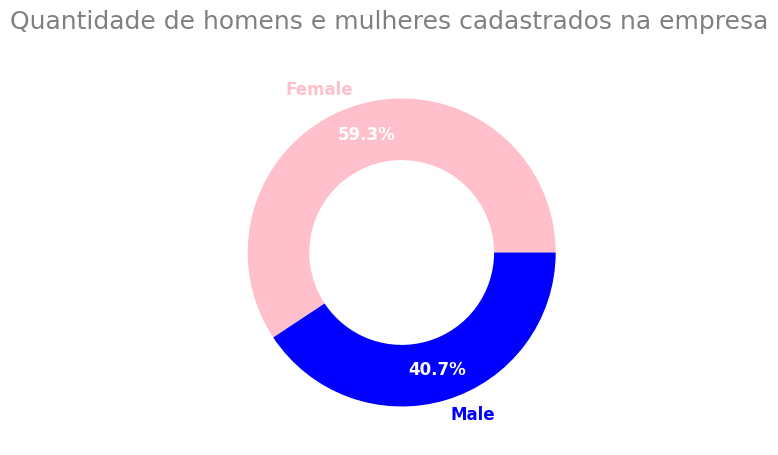

In [181]:
import matplotlib.pyplot as plt
df_genero = df['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))

plt.suptitle('Quantidade de homens e mulheres cadastrados na empresa',fontsize=18, color='grey', ha='center')

ptc, text, _ = ax.pie(df_genero, labels=df_genero.index,  autopct='%.1f%%',startangle=0,pctdistance=0.8,  wedgeprops=dict(width=0.4),
textprops=dict(size=12, fontweight='bold', color='white'),colors=['pink', 'blue'])

for t, p in zip(text, ptc):
    t.set_color(p.get_facecolor())

plt.show()


Analisando a distribuição das idades dos homens

In [182]:
df_homem_idade=df.copy()
df_homem_idade=df_homem_idade['Age'].value_counts()
df_homem_idade = df_homem_idade.reset_index()
df_homem_idade.rename(columns={'Age':'idade','count':'quantidade'}, inplace=True)

df_homem_idade

,idade,quantidade
0,31,31
1,32,30
2,52,30
3,91,29
4,63,28
...,...,...
95,42,12
96,10,12
97,77,12
98,71,12


In [183]:
bins = range(0, 101, 10)  # De 0 a 100 anos, em intervalos de 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Ex: '0-9', '10-19', ...

df_homem_idade['faixa_etaria'] = pd.cut(df_homem_idade['idade'], bins=bins, labels=labels, right=False)


df_homem_idade_agrupado = df_homem_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()

df_homem_idade_agrupado

<ipython-input-183-da0b78cde768>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,faixa_etaria,quantidade
0,0-9,185
1,10-19,195
2,20-29,211
3,30-39,241
4,40-49,195
5,50-59,202
6,60-69,210
7,70-79,167
8,80-89,200
9,90-99,194


In [185]:
import plotly.express as px


fig = px.bar(
    df_homem_idade_agrupado,
    x='quantidade',
    y='faixa_etaria',
    orientation='h',
    title='Distribuição das idades dos homens',
    labels={},
    text='quantidade',
    color='quantidade',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside', hoverinfo='y+text')

fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()
